In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from root_pandas import *

In [42]:

weighted = read_root('store/tmp/DATA_B2Kstmumu_ALL.Reduce.ApplyTrigger.ApplyCut.CalcSWeights.root')
b2kstmumu = read_root('store/tmp/DATA_B2Kstmumu_ALL.Reduce.ApplyTrigger.ApplyCut.ApplyClassifier_classifier.root')


In [43]:
b2kstmumu['weight'] = weighted['sigYield_sw'].values
b2kstmumu['clf'] = b2kstmumu['classifier']

In [44]:
b2dmumu = read_root('store/tmp/classified_signal.root')
from scipy.special import logit
b2dmumu = b2dmumu.query('signal == 1')
b2dmumu['clf'] = logit(b2dmumu['clf'])

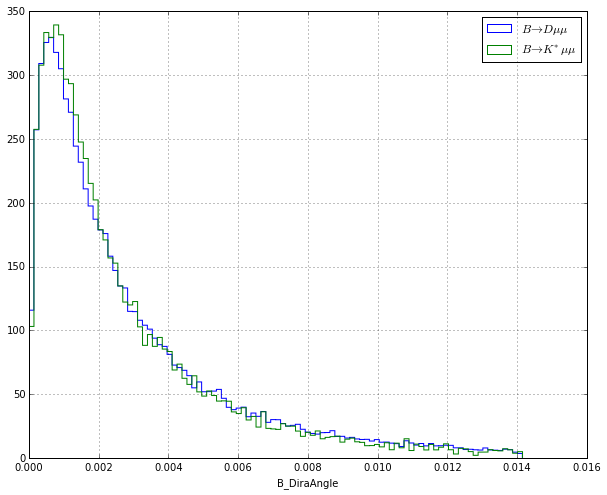

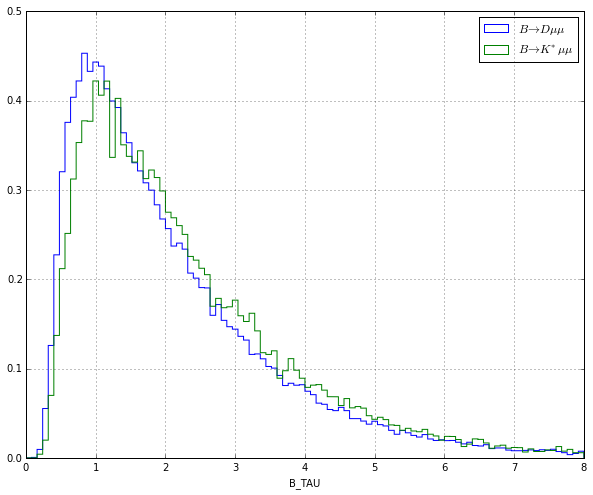

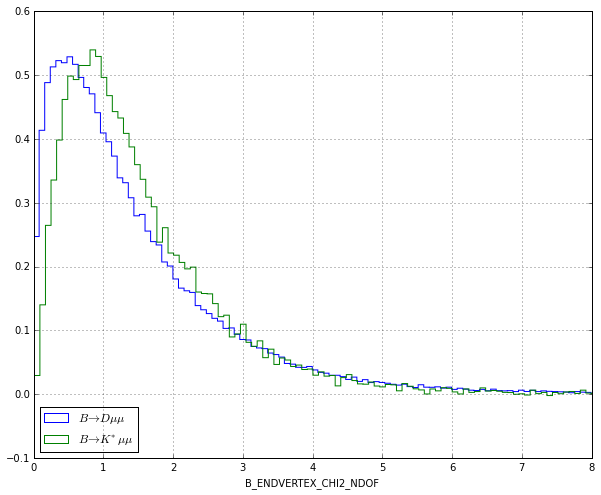

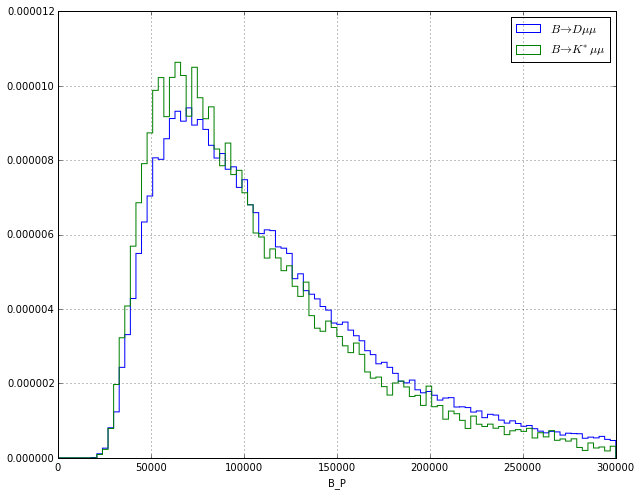

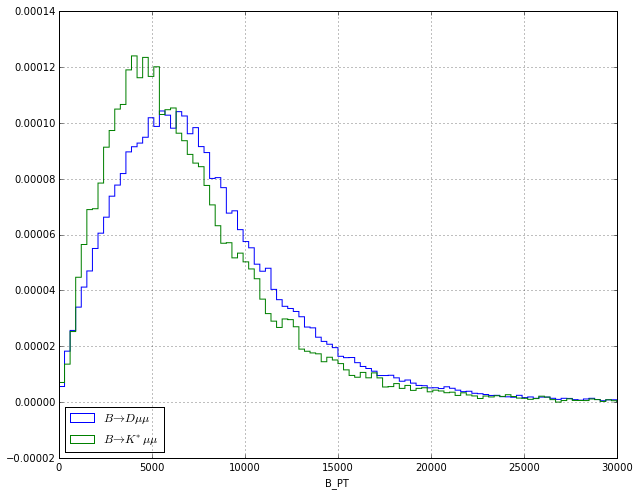

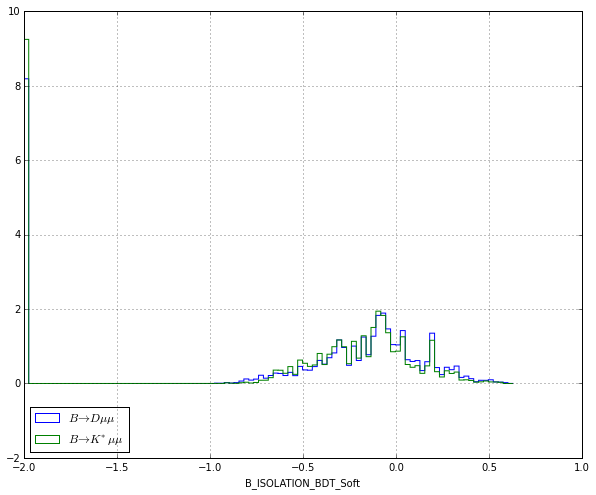

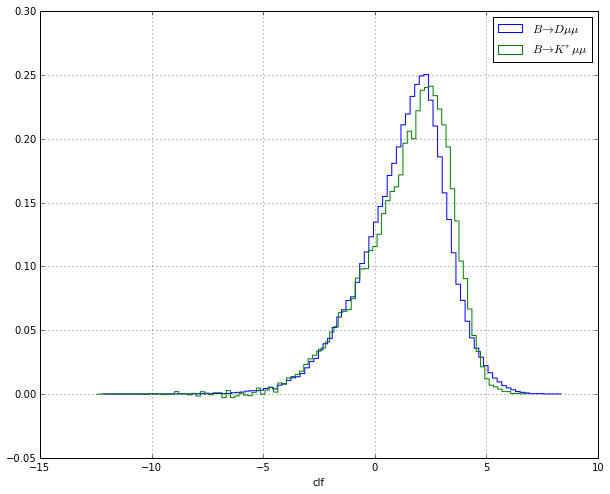

In [45]:
from run import classifier_variables

ranges = {
    'B_TAU': (0, 8),
    'B_P': (0, 300000),
    'B_PT': (0, 30000),
}

for v in classifier_variables + ['clf']:
    try:
        rng = ranges[v]
    except KeyError:
        rng = None
            
    b2dmumu[v].hist(bins=100, histtype='step', normed=True, range=rng, label='$B\\to D\\mu\\mu$')
    b2kstmumu[v].hist(bins=100, weights=b2kstmumu.weight.values, histtype='step', normed=True, range=rng, label='$B\\to K^*\\mu\\mu$')
    plt.legend(loc='best')
    plt.xlabel(v)
    plt.show()

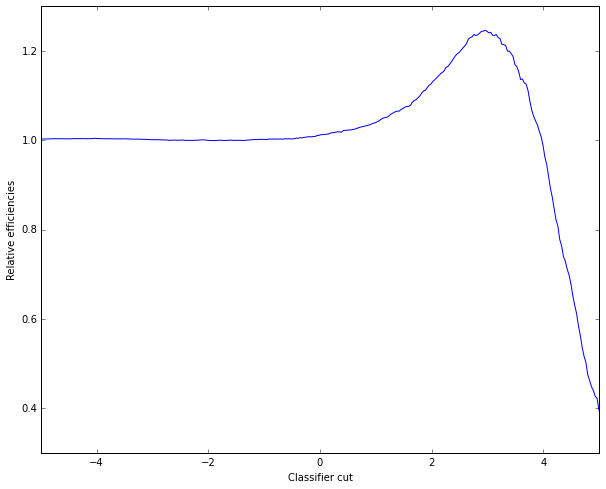

In [64]:
from sklearn.metrics import roc_curve
from scipy.interpolate import interp1d
import numpy as np
_, y1, x1 = roc_curve(np.ones(len(b2kstmumu)), b2kstmumu['clf'], sample_weight=b2kstmumu.weight)
_, y2, x2 = roc_curve(np.ones(len(b2dmumu)), b2dmumu['clf'])
curve1 = interp1d(x1, y1)
curve2 = interp1d(x2, y2)

x = np.linspace(-5, 5, 300)
plt.plot(x, curve1(x) / curve2(x))
plt.xlim(-5, 5)
plt.xlabel('Classifier cut')
plt.ylabel('Relative efficiencies')
print(x2)
